# Complex Number Geometry

### Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import timeit
import cmath
from cmath import polar, rect, phase, pi, e
from functools import reduce
from statistics import mean
from pydash import py_ as _

In [2]:
def round_complex(number, digits=2):
    if isinstance(number, complex):
        return complex(round(number.real, digits), round(number.imag, digits))
    if isinstance(number, tuple):
        return tuple( round(n, digits) for n in number )
    return complex(round(number, digits))

### Define numbers

In [3]:
A = complex(1.0, 2.0); 
B = complex(3.0, 4.0); 
C = complex(-5.0, -6.0);
numbers = [A, B, C]; numbers

[(1+2j), (3+4j), (-5-6j)]

### Compute maximum dimention

In [4]:
def max_size_pydash(numbers):
    return _(numbers) \
        .map(lambda n: [n.real, n.imag]) \
        .flatten() \
        .map(abs) \
        .max() \
        .value()

def max_size_itertools(numbers):
    return max(
            map(abs, 
            itertools.chain.from_iterable(
            map(lambda n: [n.real, n.imag], 
            numbers))))

def max_size_list_comprehension(numbers):
    return max([ max(abs(n.real), abs(n.imag)) for n in numbers ])

def max_size_reduce(numbers):
    return reduce(lambda last, n: max(last, abs(n.real), abs(n.imag)), numbers, 0)

assert max_size_pydash(numbers) \
    == max_size_itertools(numbers) \
    == max_size_list_comprehension(numbers) \
    == max_size_reduce(numbers)

max_size_reduce(numbers)

6.0

### Performance Test

Timeit default loop number is 1,000,000 meaning returned value is actually measuing in microseconds (1 second / 1,000,000 = 1μs).

Setting timeit number=1000 will return average timings in millseconds. This can be combined with repeat=10 and statistics.mean() to get average timings

In [5]:
[
    mean(timeit.repeat(lambda: max_size_pydash(numbers),              number=1000, repeat=10)),
    mean(timeit.repeat(lambda: max_size_itertools(numbers),           number=1000, repeat=10)),
    mean(timeit.repeat(lambda: max_size_list_comprehension(numbers),  number=1000, repeat=10)),
    mean(timeit.repeat(lambda: max_size_reduce(numbers),              number=1000, repeat=10)),
]

[0.12538489999715238,
 0.002479900000616908,
 0.002189199993154034,
 0.001968599995598197]

Pydash is 50x slower than itertools or native list comprehension. 
However for setup and initization code outside of any tight loops, this adds a negligable 0.1ms to total runtime

### Plot Complex Numbers

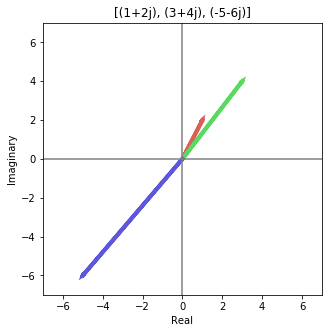

In [6]:
def plot_complex(numbers):
    max_size = max_size_reduce(numbers) + 1
    colors   = sns.color_palette("hls", len(numbers))
    numbers  = list(map(round_complex, numbers))
    
    plt.figure(figsize=(5,5))
    plt.xlim(-max_size,max_size)
    plt.ylim(-max_size,max_size)
    plt.axhline(0, color="gray")
    plt.axvline(0, color="gray")
    
    plt.title(numbers)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    
    for number, color in zip(numbers,colors):
        plt.arrow(0, 0, number.real, number.imag, ec=color, lw=4, label=number)

    plt.show()
    
plot_complex(numbers)

#### Polar Ranges

Angle pi == -pi == 3pi

In [7]:
round_complex(rect(1, pi)) == round_complex(rect(1, -pi)) == round_complex(rect(1, 3*pi))

True

Angle 0 == 2pi == -2pi

In [8]:
round_complex(rect(1, 0)) == round_complex(rect(1, 2 * pi)) == round_complex(rect(1,  -2*pi))

True

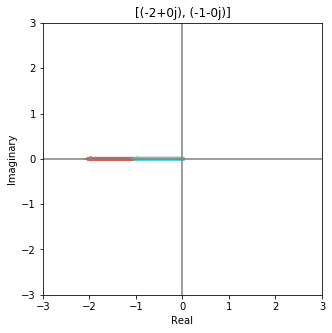

In [9]:
plot_complex([
    complex(rect(2, pi)),
    complex(rect(1, -pi)),
])

Plot full circle from 0 - 2pi

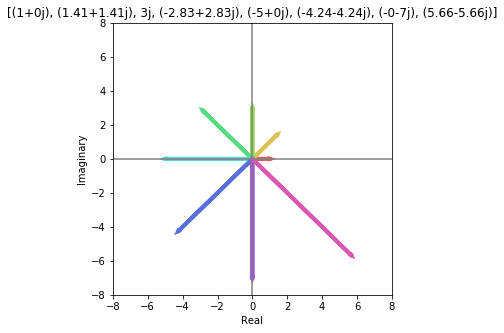

In [10]:
plot_complex([
    complex(rect(n+1, 0.25*n*pi)) for n in range(0,8)
])

#### Complex Addition

In [11]:
def plot_complex_addition(A, B, title=""):
    C = A + B
    numbers = [A,B,C,0]
    max_size = max_size_reduce(numbers) + 1
    colors   = sns.color_palette("hls", len(numbers))
    
    plt.figure(figsize=(5,5))
    plt.axhline(0, color="gray")
    plt.axvline(0, color="gray")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.grid(False)
    plt.title("%s = %s + %s = %s" % (title, A,B,C))

    plt.xlim(
        min([ n.real for n in numbers ])-1,
        max([ n.real for n in numbers ])+1
    )
    plt.ylim(
        min([ n.imag for n in numbers ])-1,
        max([ n.imag for n in numbers ])+1
    )
    plt.arrow(0, 0, A.real, A.imag, ec=colors[0], lw=1, label="A")
    plt.arrow(0, 0, B.real, B.imag, ec=colors[1], lw=1, label="B")
    plt.arrow(0, 0, C.real, C.imag, ec=colors[2], lw=1, label="C")
    
    plt.arrow(A.real, A.imag, B.real, B.imag, ec=colors[1], lw=1, label="A + B")
    plt.arrow(B.real, B.imag, A.real, A.imag, ec=colors[0], lw=1, label="B + A")
    
    plt.show()

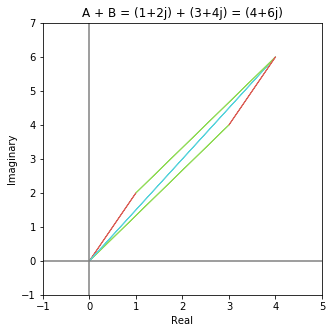

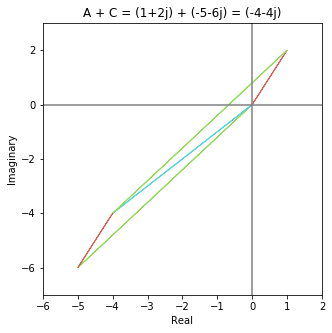

In [12]:
plot_complex_addition(A, B, "A + B")
plot_complex_addition(A, C, "A + C")

#### Complex Multiplicaton

In [13]:
def plot_complex_multiplication(A, B, title=""):
    C = A * B
    numbers = [A,B,C,0]
    max_size = max_size_reduce(numbers) + 1
    colors   = sns.color_palette("hls", len(numbers))
    
    plt.figure(figsize=(5,5))
    plt.axhline(0, color="gray")
    plt.axvline(0, color="gray")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.grid(False)
    
    plt.title("""
    %s
    = %s * %s 
    = %s * %s 
    = (%.2f * %.2f)r * (%.2f + %.2f)ϕ
    = %s  
    = %s 
    """ % (
        title,
        A, B,
        round_complex(polar(A)), round_complex(polar(B)),
        abs(A), abs(B), phase(A), phase(B),
        round_complex(polar(A*B)),
        A*B
    ))
    
    plt.xlim(
        min([ n.real for n in numbers ])-1,
        max([ n.real for n in numbers ])+1
    )
    plt.ylim(
        min([ n.imag for n in numbers ])-1,
        max([ n.imag for n in numbers ])+1
    )
    plt.arrow(0, 0, A.real, A.imag, ec=colors[0], lw=1, label="A")
    plt.arrow(0, 0, B.real, B.imag, ec=colors[1], lw=1, label="B")
    plt.arrow(0, 0, C.real, C.imag, ec=colors[2], lw=1, label="C")
        
    #plt.arrow(0, A.imag, B.real, B.imag, ec=colors[1], lw=1, label="A * B")
    #plt.arrow(0, B.imag, A.real, A.imag, ec=colors[0], lw=1, label="B * A")
    
    plt.show()

In [14]:
{ "A": A, "B": B, "A * C": A * B }

{'A': (1+2j), 'B': (3+4j), 'A * C': (-5+10j)}

In [15]:
{ 
    "A":     round_complex(polar(A)), 
    "B":     round_complex(polar(B)), 
    "A * B": round_complex(polar(A * B)) 
}

{'A': (2.24, 1.11), 'B': (5.0, 0.93), 'A * B': (11.18, 2.03)}

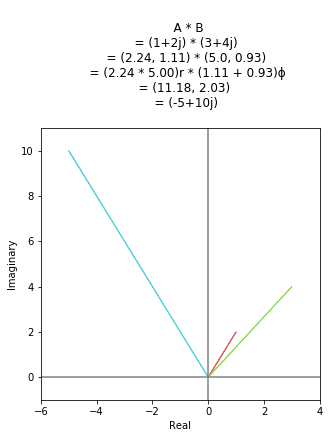

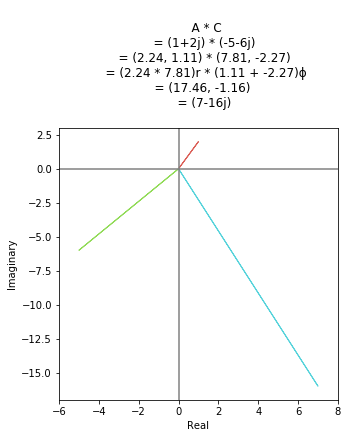

In [16]:
plot_complex_multiplication(A, B, "A * B")
plot_complex_multiplication(A, C, "A * C")